In [9]:
import pandas as pd
import numpy as np

In [11]:
X_train=np.loadtxt("input.csv",delimiter=',')
y_train=np.loadtxt("labels.csv",delimiter=',')

X_test=np.loadtxt("input_test.csv",delimiter=',')
y_test=np.loadtxt("labels_test.csv",delimiter=',')

In [12]:
print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (2000, 30000)
Shape of y_train:  (2000,)
Shape of X_test:  (400, 30000)
Shape of y_test:  (400,)


In [13]:
#Reshape

X_train=X_train.reshape(len(X_train),100,100,3)

y_train=y_train.reshape(len(y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

In [15]:
print("Reshape of X_train: ",X_train.shape)
print("Reshape of y_train: ",y_train.shape)
print("Reshape of X_test: ",X_test.shape)
print("Reshape of y_test: ",y_test.shape)

Reshape of X_train:  (2000, 100, 100, 3)
Reshape of y_train:  (2000, 1)
Reshape of X_test:  (400, 100, 100, 3)
Reshape of y_test:  (400, 1)


In [17]:
X_train[1,:]  #Range between 0 to 255

array([[[131., 128., 135.],
        [160., 157., 164.],
        [198., 192., 204.],
        ...,
        [250., 249., 247.],
        [255., 255., 253.],
        [250., 249., 245.]],

       [[140., 137., 144.],
        [127., 124., 131.],
        [120., 114., 124.],
        ...,
        [251., 253., 252.],
        [254., 255., 253.],
        [254., 255., 251.]],

       [[204., 202., 207.],
        [187., 185., 190.],
        [147., 142., 148.],
        ...,
        [249., 255., 255.],
        [238., 247., 242.],
        [232., 241., 236.]],

       ...,

       [[174., 182., 195.],
        [172., 180., 193.],
        [178., 186., 197.],
        ...,
        [ 87., 114.,  97.],
        [ 75.,  99.,  83.],
        [ 80., 105.,  86.]],

       [[166., 173., 189.],
        [164., 172., 185.],
        [172., 180., 193.],
        ...,
        [ 78., 106.,  84.],
        [ 72.,  97.,  76.],
        [ 77., 102.,  81.]],

       [[173., 180., 196.],
        [172., 179., 195.],
        [174., 1

In [19]:
#Rescale
X_train=X_train/255.0
X_test=X_test/255.0

In [20]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

In [22]:
import matplotlib.pyplot as plt
import random

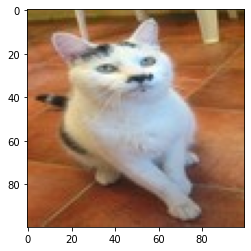

In [25]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])

# Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [32]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='sigmoid')                         
])

In [33]:
#Alternative way

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add( Dense(10,activation='sigmoid'))

In [35]:
model.compile(loss='binary_crossentropy' ,optimizer='adam',
              metrics=['accuracy'])

In [41]:
model.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 9s 269ms/step - loss: 0.0133 - accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 8s 257ms/step - loss: 0.0087 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 8s 255ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 8s 258ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 5/5
32/32 [==============================] - 8s 258ms/step - loss: 0.0028 - accuracy: 1.0000


In [42]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 35ms/step - loss: 1.5398 - accuracy: 0.6825


[1.539771556854248, 0.6825000047683716]

# Prediction For Individual Image

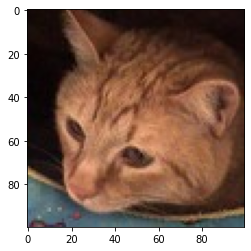

1/1 [==============================] - 0s 34ms/step
Model Says:  Cat


In [59]:
idx2=random.randint(0,len(y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))

y_pred=y_pred>0.5

if(y_pred==0):
    pred='Dog'
else:
    pred='Cat'
    
print("Model Says: ",pred)

In [63]:
model.save_weights("model.h5")